In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = ImageDataGenerator(rescale = 1.0/255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [ ]:
training_set = train_data.flow_from_directory('/content/drive/MyDrive/data (1)/train', 
                                              target_size = (64,64),
                                              batch_size = 32,
                                              class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [ ]:
training_set.filenames[1]

'cats/10.jpg'

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/data (1)/train/cats/10.jpg')

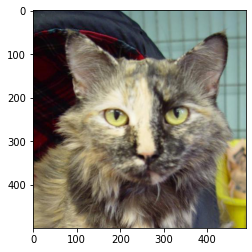

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
training_set.class_indices


{'cats': 0, 'dogs': 1}

In [ ]:
test_data = ImageDataGenerator(rescale = 1.0/255)
testing_set = test_data.flow_from_directory('/content/drive/MyDrive/data (1)/test',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 20 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPool2D,Dense,Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters = 32,
                 kernel_size = (5,5),
                 activation ='relu',
                 padding = 'valid',
                 input_shape = [64,64,3]))

In [ ]:
model.add(MaxPool2D(pool_size = (2,2), strides = 2))

In [ ]:
model.add(Conv2D(filters = 64,
                 kernel_size =(5,5),
                 activation = 'relu',
                 padding = 'valid'))

In [ ]:
model.add(MaxPool2D(pool_size = (2,2), strides = 2))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units = 32, activation = "relu"))
model.add(Dropout(0.4))

In [ ]:
model.add(Dense(units=1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
model.fit(training_set, validation_data=testing_set, epochs = 100)

Epoch 1/100
2/2 [==============================] - 2s 540ms/step - loss: 0.7159 - accuracy: 0.5000 - val_loss: 0.7261 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 1s 617ms/step - loss: 0.7456 - accuracy: 0.4500 - val_loss: 0.6858 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 1s 258ms/step - loss: 0.6715 - accuracy: 0.5750 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 1s 611ms/step - loss: 0.6993 - accuracy: 0.5250 - val_loss: 0.6859 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 1s 602ms/step - loss: 0.6909 - accuracy: 0.5250 - val_loss: 0.6838 - val_accuracy: 0.8000
Epoch 6/100
2/2 [==============================] - 1s 628ms/step - loss: 0.6893 - accuracy: 0.5250 - val_loss: 0.6838 - val_accuracy: 0.5500
Epoch 7/100
2/2 [==============================] - 1s 601ms/step - loss: 0.6942 - accuracy: 0.5500 - val_loss: 0.6834 - val_accuracy: 0.5500
Epoch 8/100
2

In [ ]:
model.fit(training_set, validation_data =  testing_set, epochs = 200)

Epoch 1/200
2/2 [==============================] - 1s 375ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 1.3523 - val_accuracy: 0.6500
Epoch 2/200
2/2 [==============================] - 1s 265ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 1.4546 - val_accuracy: 0.7000
Epoch 3/200
2/2 [==============================] - 1s 251ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 1.5507 - val_accuracy: 0.7000
Epoch 4/200
2/2 [==============================] - 1s 259ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 1.6479 - val_accuracy: 0.6500
Epoch 5/200
2/2 [==============================] - 1s 638ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 1.7610 - val_accuracy: 0.6500
Epoch 6/200
2/2 [==============================] - 1s 266ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 1.9042 - val_accuracy: 0.6500
Epoch 7/200
2/2 [==============================] - 1s 659ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 2.0361 - val_accuracy: 0.6000
Epoch 8/200
2

In [ ]:
model.fit(training_set, validation_data =  testing_set, epochs = 300)

Epoch 1/300
2/2 [==============================] - 1s 734ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 2.9336 - val_accuracy: 0.6500
Epoch 2/300
2/2 [==============================] - 1s 634ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 3.0322 - val_accuracy: 0.6500
Epoch 3/300
2/2 [==============================] - 1s 582ms/step - loss: 9.1319e-04 - accuracy: 1.0000 - val_loss: 3.1167 - val_accuracy: 0.6500
Epoch 4/300
2/2 [==============================] - 1s 617ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.1996 - val_accuracy: 0.6000
Epoch 5/300
2/2 [==============================] - 1s 269ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 3.1345 - val_accuracy: 0.5500
Epoch 6/300
2/2 [==============================] - 1s 628ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 3.1185 - val_accuracy: 0.5500
Epoch 7/300
2/2 [==============================] - 1s 282ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 3.1453 - val_accuracy: 0.5500
Epoch 8/3

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
test_img = image.load_img('/content/drive/MyDrive/data (1)/test/cats/104.jpg',target_size = (64,64,3))


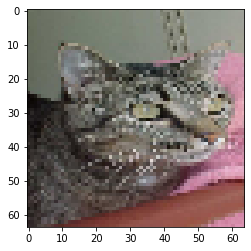

In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(test_img)

In [ ]:
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
test_img = test_img/255

In [ ]:
result = model.predict(test_img)

In [ ]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
result

array([[8.264548e-05]], dtype=float32)

In [ ]:
if np.round(result[0][0]) == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

cat
